# PUI midterm

## Part 1: Multiple choice and theoretic questions
Please write and explain your answer after each question

### Question 1. What would the p-value of 0.04 mean for t-test comparing two samples of observations (select all that applies):
A) sample averages are at least 4% different

B) sample averages are the same

C) sample averages are different

D) one can reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or with 95% confidence) since p-values is below 0.05

E) one can't reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or 95% confidence) singe p-value does not reach 0.05

F) one can reject the null hypothesis that the samples follows the underlying distributions with the different means at 5% significance level (or 95% confidence)

G) probability that two samples have the same means is 4%

Answer: 

C) sample averages are different 

-> if the sample avergaes were same, the p value would be one.


D) one can reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or with 95% confidence) since p-values is below 0.05

-> In order to reject the null hypothesis that the samples come from distributions with the same mean at 5% signifance level, the p values need to be below 0.05 as that indicates 5%.
since 0.04 is lesser than 0.05. We can reject the null hypothesis at this level.

### Question 2. What is true regarding normal and log-normal distributions (select all that applies):
A) Quantities following log-normal distributions have higher probabilities for outliers compared to normal distributions

B) Outliers significantly different from the mean are more common for the normally distributed variables compared to log normally distributed variables

C) Logarithm of the normally distributed quantity follow a log-normal distribution

D) Logarithm of the log-normally distributed quantity follows a normal distribution

E) Probability density function of the log-normally distributed variable equals to the logarithm of the probability density function of the normally distributed variable

Answer:

A) Quantities following log-normal distributions have higher probabilities for outliers compared to normal distributions

->If it follows a log normal distribution, the data is more spread out and the probability of a value more further away from the mean is higher than normal distribution


D) Logarithm of the log-normally distributed quantity follows a normal distribution

-> A lognormal distribution is distribution of a variable in which logarithm is normally distributed. Hence logarithm of the log-normally distributed quantity follows a normal distribution.




### Question 3. 
Imagine training a model which considers multiple sattelite images of urban traffic and tries to find groups of typical
(repeated with minor deviations) scenarios. How would you classify this problem from Machine Learning perspective?

A) Supervised leanring;

B) Unsupervised learning;

C) Semi-supervised learning;

D) Reinforcement learning.

Explain you choice:

Answer:

B) Unsupervised Learning: We can use unsupervised learning methods like clustering if we don't know what the typical scenarios are. The minor deviations would be clustered into typical scenarios as desired.


Also Possible:
C) Semi Supervised Learning: If we have certain examples of what the typcial scenarios are, that can be used to lead other training data in understanding the scenarios 



### Question 4. 
Please explain why would you need separate training, validation and test samples to learn the model. In which cases you may need all three, including a validation sample?

Answer:

Training -> Understand the relationship between the features and labels. Create a logic or model to govern which category or value to assign to an input.

Testing -> Test the best model obtained and understand if the model is performing well on data not seen before.

Validation set -> When we want to test the data we test while training the model itself at each iteration and prevent the model from being overfit to the trianing data.


Why do they have to be separate? This is done because when we show the model unknown data (testing or validation as per the scenario), we get a real idea of the performance of the model. We can understand if the model has been overfitted to the training data.

 
In which cases you may need all three, including a validation sample?

-The dataset is large and we can afford to split it into 3 sets without sacrificing training performance

-When we have hyperparameters for the model, a validation set is useful to help tune the parameters

-When we are facing an issue of overfitting, we can try using a validation set which will iterate against unseen data in the training phase and reduce overfitting



In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto 
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Part 2: NYPD data analysis

In this part, you need to download New York Police Department (NYPD) complaints data for 2019 and write code for three following sections (each having own sub-sections): Data cleaning, Exploratory analysis and Hypothesis testing

###  download NYPD complaints data:
two options:
1. download with curl or urllib methods
2. download with API

you can also manually download here: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [2]:
# !curl https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD > NYPD_data.csv

In [3]:
# !wget https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD

In [4]:
# !wget https://www.dropbox.com/s/u78fk8g0wkf3xwu/NYPD_data.csv?dl=0

### read data

In [5]:
#data = pd.read_csv('https://data.cityofnewyork.us/resource/qgea-i56i.csv')
data = pd.read_csv('NYPD_Complaint_Data_Historic.csv')
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,506547392,03/29/2018,20:30:00,NaN,NaN,32.0,03/30/2018,351,CRIMINAL MISCHIEF & RELATED OF,254.0,...,NaN,NaN,40.810877,-73.941064,"(40.810877241, -73.941064151)",PATROL BORO MAN NORTH,NaN,25-44,WHITE,F
1,629632833,02/06/2018,23:15:00,NaN,NaN,52.0,02/07/2018,341,PETIT LARCENY,333.0,...,F,NaN,40.873671,-73.908014,"(40.873671035, -73.908013649)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D
2,787203902,11/21/2018,00:15:00,11/21/2018,00:20:00,75.0,11/21/2018,341,PETIT LARCENY,321.0,...,F,NaN,40.651782,-73.885457,"(40.651782232, -73.885456761)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,D
3,280364018,06/09/2018,21:42:00,06/09/2018,21:43:00,10.0,06/10/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,M,NaN,40.759310,-73.994706,"(40.759310399, -73.994706072)",PATROL BORO MAN SOUTH,NaN,18-24,WHITE HISPANIC,F
4,985800320,11/10/2018,19:40:00,11/10/2018,19:45:00,19.0,11/10/2018,341,PETIT LARCENY,333.0,...,F,NaN,40.764536,-73.970728,"(40.764535539, -73.970728388)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D


In [6]:
data.shape

(7825499, 35)

In [7]:
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

The complete data dictionary is here: https://data.cityofnewyork.us/api/views/qgea-i56i/files/b21ec89f-4d7b-494e-b2e9-f69ae7f4c228?download=true&filename=NYPD_Complaint_Incident_Level_Data_Footnotes.pdf. 

The focus of this notebook would be on following columns - 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'PARKS_NM', 'Latitude', 'Longitude'.

The 'CMPLNT_NUM' is a unique id for each complaint, 'CMPLNT_FR_DT' and 'CMPLNT_FR_TM' are date and time of complaint respectively, 'OFNS_DESC' is the type of offence reported, 'BORO_NM' is name of borough where complaint was reported, 'PARKS_NM' is name of park where complaint recorded (if any) and 'Latitude', 'Longitude' are location of complaint.


## Section 1 - Data cleaning tasks
1. Drop rows with a) missing/wrong complaint date and time b) missing borough name and c) duplicate complaint number ('CMPLNT_NUM' column)
2. Filter out data where incident occured in a park or greenspace. Next, keep data for 2019 and after.
3. Keep specific crime categories - type 1 crimes defined by FBI: The list is given here https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions
4. Filter by area (drop rows with location outside NYC)

### 1. filter out missing/wrong date and times, missing borough name and duplicate complaints from the data

In [8]:
# code here 
# make sure to convert date column to datetime
#and 'CMPLNT_FR_TM'

#filter out missing/wrong date and times

S11_df = data.copy().reset_index(drop=True)
S11_df['Date-Time'] = pd.to_datetime(S11_df['CMPLNT_FR_DT'] + ' ' + S11_df['CMPLNT_FR_TM'],errors = 'coerce')

In [9]:
sanityindex = (pd.isnull(S11_df['Date-Time']))

S11_df = S11_df[~sanityindex]

S11_df.shape

(7824663, 36)

In [10]:
#filter out missing borough name

S11_df['BORO_NM'].unique()

array(['MANHATTAN', 'BRONX', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND', nan],
      dtype=object)

In [11]:
sanityindex = pd.isnull(S11_df['BORO_NM'])

S11_df = S11_df[~sanityindex]

S11_df.shape

(7812184, 36)

In [12]:
#Filter out duplicate complaints from the data

S11_df = S11_df.drop_duplicates('CMPLNT_NUM')

S11_df.shape

(7808233, 36)

In [13]:
S11_df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Date-Time
0,506547392,03/29/2018,20:30:00,NaN,NaN,32.0,03/30/2018,351,CRIMINAL MISCHIEF & RELATED OF,254.0,...,NaN,40.810877,-73.941064,"(40.810877241, -73.941064151)",PATROL BORO MAN NORTH,NaN,25-44,WHITE,F,2018-03-29 20:30:00
1,629632833,02/06/2018,23:15:00,NaN,NaN,52.0,02/07/2018,341,PETIT LARCENY,333.0,...,NaN,40.873671,-73.908014,"(40.873671035, -73.908013649)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D,2018-02-06 23:15:00
2,787203902,11/21/2018,00:15:00,11/21/2018,00:20:00,75.0,11/21/2018,341,PETIT LARCENY,321.0,...,NaN,40.651782,-73.885457,"(40.651782232, -73.885456761)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,D,2018-11-21 00:15:00
3,280364018,06/09/2018,21:42:00,06/09/2018,21:43:00,10.0,06/10/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,NaN,40.759310,-73.994706,"(40.759310399, -73.994706072)",PATROL BORO MAN SOUTH,NaN,18-24,WHITE HISPANIC,F,2018-06-09 21:42:00
4,985800320,11/10/2018,19:40:00,11/10/2018,19:45:00,19.0,11/10/2018,341,PETIT LARCENY,333.0,...,NaN,40.764536,-73.970728,"(40.764535539, -73.970728388)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D,2018-11-10 19:40:00


### 2. Remove rows where location is parks or greenspace and keep rows for 2019 and after

In [14]:
S12_df = S11_df.copy().reset_index(drop=True)

In [15]:
# parks name is in 'PARKS_NM' column. If a crime has occured outside a parkspace, this value would be NaN

S12_df['PARKS_NM'].unique()

array([nan, 'ARVERNE PLAYGROUND', 'MURRAY PLAYGROUND', ..., 'PADRE PLAZA',
       'RALPH BUNCHE PARK', 'LAS CASITAS COMMUNITY GARDEN'], dtype=object)

In [16]:
sanityindex = pd.isnull(S12_df['PARKS_NM'])

S12_df = S12_df[sanityindex]

S12_df.shape

(7777410, 36)

In [17]:
## check the timeline of data

min(S12_df['Date-Time']),max(S12_df['Date-Time'])

(Timestamp('1900-03-10 19:00:00'), Timestamp('2021-12-31 23:50:00'))

<AxesSubplot:xlabel='Date-Time'>

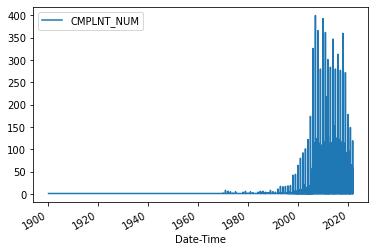

In [18]:
S12_df[['Date-Time','CMPLNT_NUM']].groupby(['Date-Time']).count().plot()

In [19]:
# remove data <2019

import datetime as dt

def getdate(x):
    return int(x.strftime('%Y'))

date_sanityindex = S12_df['Date-Time'].apply(getdate) >= 2019
S12_df = S12_df[date_sanityindex]
S12_df.shape

(1297955, 36)

In [20]:
S12_df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Date-Time
680721,708871766,12/23/2021,13:30:00,NaN,NaN,43.0,12/23/2021,126,MISCELLANEOUS PENAL LAW,640.0,...,NaN,40.830443,-73.871349,"(40.83044253800006, -73.871349147)",PATROL BORO BRONX,NaN,18-24,BLACK,M,2021-12-23 13:30:00
680741,498849139,12/31/2019,01:00:00,12/31/2019,01:50:00,101.0,12/31/2019,578,HARRASSMENT 2,638.0,...,NaN,40.596994,-73.767859,"(40.59699444300003, -73.76785904499997)",PATROL BORO QUEENS SOUTH,NaN,45-64,BLACK,F,2019-12-31 01:00:00
680742,123171799,12/31/2021,21:15:00,NaN,NaN,43.0,12/31/2021,106,FELONY ASSAULT,109.0,...,NaN,40.817877,-73.865994,"(40.81787660100008, -73.86599391299995)",PATROL BORO BRONX,NaN,65+,BLACK,M,2021-12-31 21:15:00
680762,725872999,12/21/2021,23:00:00,NaN,NaN,45.0,12/22/2021,114,ARSON,264.0,...,NaN,40.859744,-73.826259,"(40.859743612000045, -73.82625891199996)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E,2021-12-21 23:00:00
680763,432371969,12/31/2021,18:20:00,12/31/2021,18:30:00,111.0,12/31/2021,113,FORGERY,725.0,...,NaN,40.746775,-73.780867,"(40.74677541300008, -73.78086726799995)",PATROL BORO QUEENS NORTH,NaN,UNKNOWN,UNKNOWN,E,2021-12-31 18:20:00


### 3. keep type 1 crimes as defined by FBI from the data : 
https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions

The crime type is present in the 'OFNS_DESC' column. You just need to keep the following categories: "'ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE',
                'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY'"

In [21]:
S13_df = S12_df.copy().reset_index(drop=True)

In [22]:
# code here

S13_df['OFNS_DESC'].unique()

array(['MISCELLANEOUS PENAL LAW', 'HARRASSMENT 2', 'FELONY ASSAULT',
       'ARSON', 'FORGERY', 'GRAND LARCENY', 'PETIT LARCENY',
       'GRAND LARCENY OF MOTOR VEHICLE', 'ASSAULT 3 & RELATED OFFENSES',
       'OFFENSES INVOLVING FRAUD', 'FRAUDS',
       'OTHER STATE LAWS (NON PENAL LA', 'BURGLARY', 'ROBBERY',
       'DANGEROUS WEAPONS', 'CRIMINAL MISCHIEF & RELATED OF',
       'THEFT-FRAUD', 'VEHICLE AND TRAFFIC LAWS', 'DANGEROUS DRUGS',
       'SEX CRIMES', 'OFF. AGNST PUB ORD SENSBLTY &', 'RAPE',
       'ADMINISTRATIVE CODE', 'INTOXICATED & IMPAIRED DRIVING',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON',
       'CRIMINAL TRESPASS', 'POSSESSION OF STOLEN PROPERTY',
       'UNAUTHORIZED USE OF A VEHICLE', 'OTHER OFFENSES RELATED TO THEF',
       'ENDAN WELFARE INCOMP', 'PETIT LARCENY OF MOTOR VEHICLE',
       'NYS LAWS-UNCLASSIFIED FELONY',
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
       'KIDNAPPING & RELATED OFFENSES', 'FRAUDULENT ACCOSTING',
       "B

In [23]:
S13_df = S13_df[S13_df['OFNS_DESC'].isin(['ARSON'\
                               , 'BURGLARY'\
                               , 'FELONY ASSAULT'\
                               , 'GRAND LARCENY' \
                               ,'GRAND LARCENY OF MOTOR VEHICLE'\
                               , 'MURDER & NON-NEGL. MANSLAUGHTER'\
                               , 'RAPE'\
                               , 'ROBBERY'\
                                 ])]
S13_df['OFNS_DESC'].unique()

array(['FELONY ASSAULT', 'ARSON', 'GRAND LARCENY',
       'GRAND LARCENY OF MOTOR VEHICLE', 'BURGLARY', 'ROBBERY', 'RAPE'],
      dtype=object)

In [24]:
S13_df.shape

(287016, 36)

### 4. keep rows with location within NYC

zip codes file is present in the github 'Data' repository as "ZIPCODE.zip". You can also download the shapefile here: https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u/data?no_mobile=true .

Do a spatial joint to keep only rows within NYC

In [25]:
S14_df = S13_df.copy()

In [26]:
## zip codes map
zips = gpd.read_file('ZIP_CODE_040114/ZIP_CODE_040114.shp')
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


Note: 'ZIPCODE' column has unique codes. The borough name is given in 'COUNTY' column. The counties and boroughs are synonymous in NYC. 'New York' county corresponds to Manhattan, 'Kings' to Brooklyn, 'Richmond' to Staten Island

In [27]:
zips.COUNTY.unique()

array(['Queens', 'Kings', 'Bronx', 'New York', 'Richmond'], dtype=object)

<AxesSubplot:>

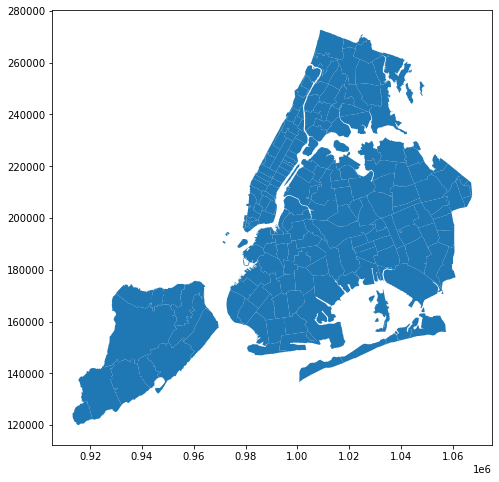

In [28]:
zips.plot(figsize=(8,8))

In [29]:
# remove rows with location outside NYC

S14_df.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Date-Time'],
      dtype='object')

In [30]:
pd.set_option('display.max_columns', None)
S14_df.head(3)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Date-Time
2,123171799,12/31/2021,21:15:00,NaN,NaN,43.0,12/31/2021,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BRONX,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1021342.0,237277.0,UNKNOWN,WHITE HISPANIC,M,NaN,40.817877,-73.865994,"(40.81787660100008, -73.86599391299995)",PATROL BORO BRONX,NaN,65+,BLACK,M,2021-12-31 21:15:00
3,725872999,12/21/2021,23:00:00,NaN,NaN,45.0,12/22/2021,114,ARSON,264.0,"ARSON, MOTOR VEHICLE 1 2 3 & 4",COMPLETED,FELONY,BRONX,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1032310.0,252550.0,NaN,NaN,NaN,NaN,40.859744,-73.826259,"(40.859743612000045, -73.82625891199996)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E,2021-12-21 23:00:00
5,195931501,12/30/2019,19:20:00,NaN,NaN,18.0,12/30/2019,109,GRAND LARCENY,443.0,"LARCENY,GRAND OF BICYCLE",COMPLETED,FELONY,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,991601.0,215955.0,UNKNOWN,UNKNOWN,U,NaN,40.759428,-73.973467,"(40.75942823400004, -73.97346676199999)",PATROL BORO MAN SOUTH,NaN,45-64,BLACK,M,2019-12-30 19:20:00


In [31]:
geometry = [Point(xy) for xy in zip(S14_df.Longitude,S14_df.Latitude)]
GeoS14_df = gpd.GeoDataFrame(S14_df,geometry=geometry,crs={'init': 'epsg:4326'})
GeoS14_df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Date-Time,geometry
2,123171799,12/31/2021,21:15:00,NaN,NaN,43.0,12/31/2021,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BRONX,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1021342.0,237277.0,UNKNOWN,WHITE HISPANIC,M,NaN,40.817877,-73.865994,"(40.81787660100008, -73.86599391299995)",PATROL BORO BRONX,NaN,65+,BLACK,M,2021-12-31 21:15:00,POINT (-73.86599 40.81788)
3,725872999,12/21/2021,23:00:00,NaN,NaN,45.0,12/22/2021,114,ARSON,264.0,"ARSON, MOTOR VEHICLE 1 2 3 & 4",COMPLETED,FELONY,BRONX,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1032310.0,252550.0,NaN,NaN,NaN,NaN,40.859744,-73.826259,"(40.859743612000045, -73.82625891199996)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E,2021-12-21 23:00:00,POINT (-73.82626 40.85974)
5,195931501,12/30/2019,19:20:00,NaN,NaN,18.0,12/30/2019,109,GRAND LARCENY,443.0,"LARCENY,GRAND OF BICYCLE",COMPLETED,FELONY,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,991601.0,215955.0,UNKNOWN,UNKNOWN,U,NaN,40.759428,-73.973467,"(40.75942823400004, -73.97346676199999)",PATROL BORO MAN SOUTH,NaN,45-64,BLACK,M,2019-12-30 19:20:00,POINT (-73.97347 40.75943)
9,696904327,12/29/2019,13:15:00,NaN,NaN,77.0,12/29/2019,110,GRAND LARCENY OF MOTOR VEHICLE,441.0,"LARCENY,GRAND OF AUTO",COMPLETED,FELONY,BROOKLYN,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,997713.0,184978.0,NaN,NaN,NaN,NaN,40.674397,-73.951466,"(40.67439660600007, -73.95146640899996)",PATROL BORO BKLYN NORTH,NaN,25-44,BLACK,M,2019-12-29 13:15:00,POINT (-73.95147 40.67440)
13,730604096,12/26/2021,12:00:00,NaN,NaN,42.0,12/31/2021,109,GRAND LARCENY,421.0,"LARCENY,GRAND FROM VEHICLE/MOTORCYCLE",COMPLETED,FELONY,BRONX,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1009516.0,239520.0,NaN,NaN,NaN,NaN,40.824075,-73.908711,"(40.82407474000007, -73.90871090099995)",PATROL BORO BRONX,NaN,25-44,BLACK,M,2021-12-26 12:00:00,POINT (-73.90871 40.82407)


In [32]:
zips.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [33]:
GeoS14_df.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Need to change the coordinate system of GeoS14_df

In [34]:
S14_gdf = gpd.sjoin(GeoS14_df.to_crs({'init': 'epsg:2263'}),zips,op='within',how='inner')
S14_gdf.head(3)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Date-Time,geometry,index_right,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
2,123171799,12/31/2021,21:15:00,NaN,NaN,43.0,12/31/2021,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BRONX,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1021342.0,237277.0,UNKNOWN,WHITE HISPANIC,M,NaN,40.817877,-73.865994,"(40.81787660100008, -73.86599391299995)",PATROL BORO BRONX,NaN,65+,BLACK,M,2021-12-31 21:15:00,POINT (1021341.605 237280.017),40,10473,0,Bronx,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
109,586691204,11/12/2021,01:14:00,NaN,NaN,43.0,11/12/2021,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,FELONY,BRONX,OPPOSITE OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1027935.0,238389.0,UNKNOWN,UNKNOWN,U,NaN,40.820899,-73.842167,"(40.820898581000044, -73.84216725399993)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E,2021-11-12 01:14:00,POINT (1027934.606 238392.017),40,10473,0,Bronx,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
228,313671333,12/22/2019,12:00:00,12/23/2019,16:00:00,43.0,12/23/2019,107,BURGLARY,221.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BRONX,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1027106.0,239720.0,NaN,NaN,NaN,NaN,40.824556,-73.845154,"(40.82455585500002, -73.84515392999998)",PATROL BORO BRONX,NaN,45-64,BLACK,M,2019-12-22 12:00:00,POINT (1027105.606 239723.017),40,10473,0,Bronx,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0


In [35]:
S14_gdf.shape

(287012, 50)

## Section 2 -Exploratory analysis tasks

1. Visualize the time series of the total number of type 1 crimes for the whole city per day.
2. Visualize part 1 crimes grouped on a) borough level as a bar plot and b) zip code level as a heatmap normalized by population (per 100,000). Use quantiles scheme colormap.
3. Plot following bar plots: the total number of part 1 crimes by a) month, b) day of week( use weekday names for labels) and c) hour of day.
4. Plot two bar plots: Day of the week and hour of the day timelines for felony vs grand larceny (normalized per 100,000 population, comparing these two types of crime on the same bar plots)
5. Compare the %% decomposition of type 1 crimes by category of crime within different boroughs by plotting pie charts for each borough


In [36]:
S2_gdf = S14_gdf.copy().reset_index(drop=True)

### 1. time series plotting

In [37]:
# group total crimes by daily numbers
import datetime as dt

S21_gdf = S2_gdf.copy()
S21_gdf['Date'] = S2_gdf['Date-Time'].dt.date
S21_gdf = S21_gdf[['Date','CMPLNT_NUM']].groupby(['Date']).count()
S21_gdf = S21_gdf.rename({'CMPLNT_NUM':'CRIME COUNT'},axis='columns')
S21_gdf.head()

,CRIME COUNT
Date,
2019-01-01,326
2019-01-02,206
2019-01-03,261
2019-01-04,263
2019-01-05,230


<AxesSubplot:xlabel='Date'>

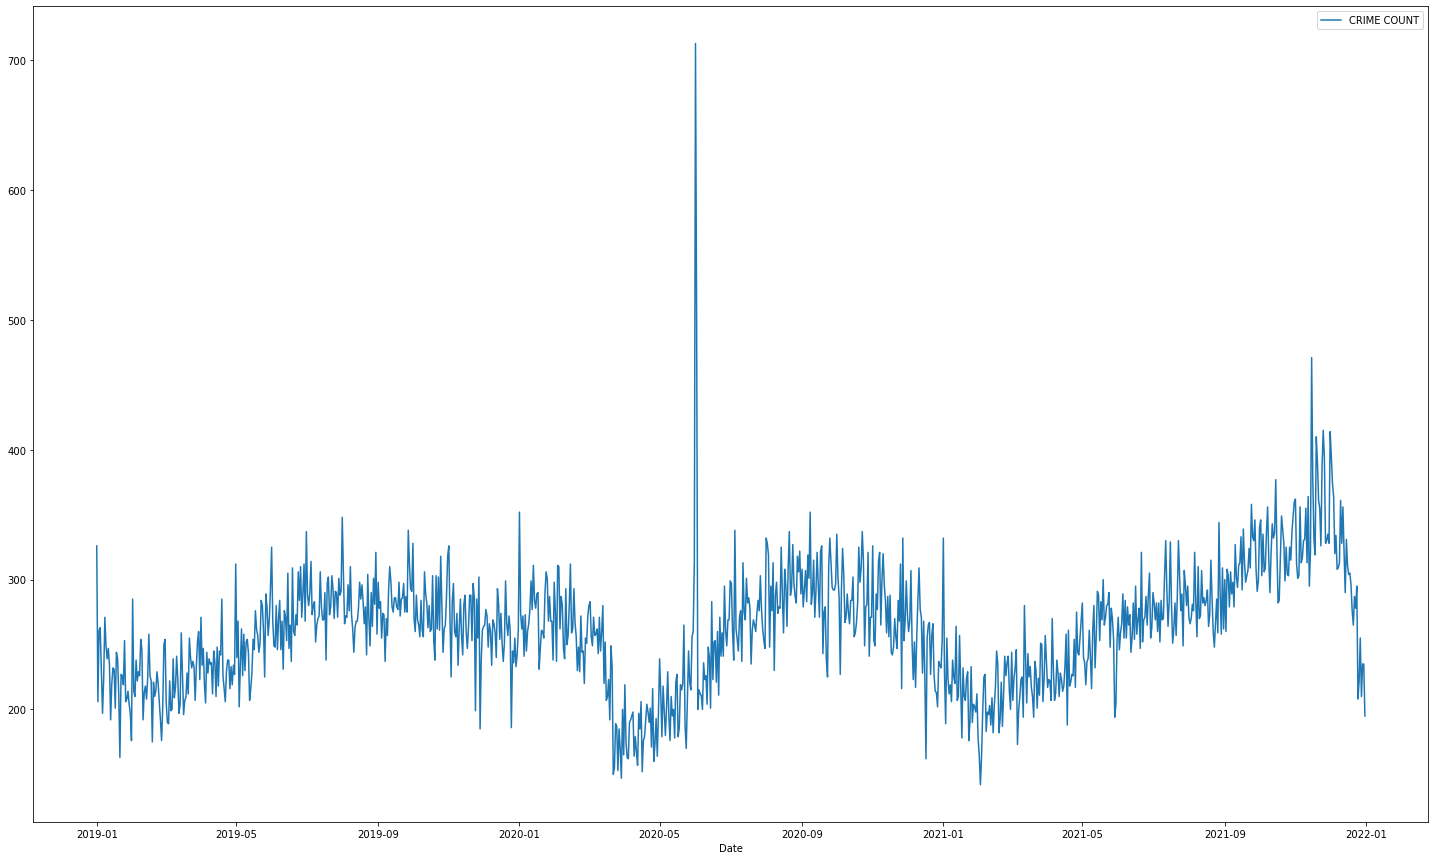

In [38]:
# plot as a time series
S21_gdf.plot(figsize=(25,15))

### 2. plotting on borough and zip code level normalized by population

In [39]:
S22_gdf = S2_gdf.copy()

In [40]:
# group crime numbers by borough and normalize by their population (per 100,000). Population is given in the zips shapefile

#Creating a boro-population table from zips and renaming counties to boro names
Boro_Pop = zips[['COUNTY','POPULATION']].groupby('COUNTY').sum().reset_index(drop=False)
Boro_Pop['COUNTY'] = Boro_Pop['COUNTY'].map({'Kings':'BROOKLYN'\
                                                        ,'New York':'MANHATTAN'\
                                                        ,'Richmond':'STATEN ISLAND'\
                                                        ,'Queens':'QUEENS'\
                                                        ,'Bronx':'BRONX'})
Boro_Pop = Boro_Pop.rename({'COUNTY':'BORO_NM'},axis=1).set_index('BORO_NM')


#Creating a Crime count table from NYPD data
S22_Boro_df = S22_gdf[['BORO_NM','CMPLNT_NUM']].groupby(['BORO_NM']).count()

#Merging both Tables
S22_Boro_df = pd.merge(S22_Boro_df,Boro_Pop,left_index=True, right_index=True)
S22_Boro_df = S22_Boro_df.rename({'CMPLNT_NUM':'CRIME COUNT'},axis='columns')

#Creating Normalized Crime Column
S22_Boro_df['Crime per 100,000'] = (S22_Boro_df['CRIME COUNT']/S22_Boro_df['POPULATION'])*100000

S22_Boro_df.head()

,CRIME COUNT,POPULATION,"Crime per 100,000"
BORO_NM,,,
BRONX,62295,1431301.0,4352.333995
BROOKLYN,80816,2548896.0,3170.627597
MANHATTAN,77449,1687421.0,4589.785240
QUEENS,59173,2262768.0,2615.071452
STATEN ISLAND,7279,468220.0,1554.611080


<AxesSubplot:xlabel='BORO_NM'>

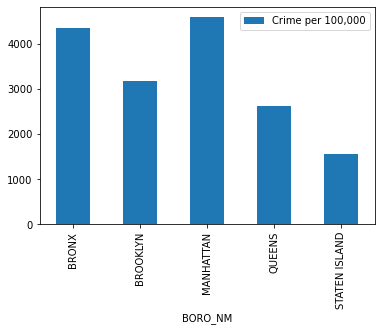

In [41]:
# plot as a bar plot
S22_Boro_df['Crime per 100,000'].plot.bar(legend=True)

In [42]:
# now group by zip codes, normalize by their population

#Repeat similar actions as done in Boroughs for Zipcodes
Zip_Pop = zips[['ZIPCODE','POPULATION']].groupby('ZIPCODE').sum()
S22_Zip_df = S2_gdf[['ZIPCODE','CMPLNT_NUM']].groupby(['ZIPCODE']).count()
S22_Zip_df = pd.merge(S22_Zip_df,Zip_Pop,left_index=True, right_index=True)
S22_Zip_df = S22_Zip_df.rename({'CMPLNT_NUM':'CRIME COUNT'},axis='columns')

#Normalize crime rate by population
S22_Zip_df['Crime per 100,000'] = (S22_Zip_df['CRIME COUNT']/S22_Zip_df['POPULATION'])*100000
S22_Zip_df = S22_Zip_df.reset_index()
S22_Zip_df.head()

,ZIPCODE,CRIME COUNT,POPULATION,"Crime per 100,000"
0,00083,196,25.0,784000.000000
1,10001,4322,22413.0,19283.451568
2,10002,3703,81305.0,4554.455446
3,10003,3095,55878.0,5538.852500
4,10004,251,8748.0,2869.227252


<AxesSubplot:>

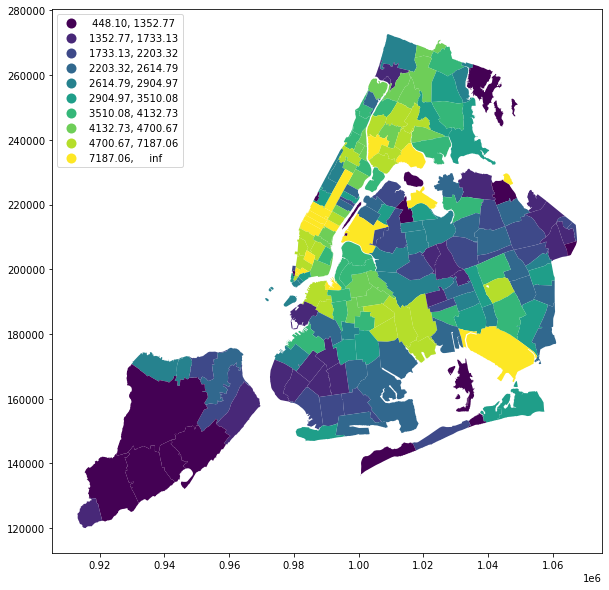

In [43]:
# plot as a heatmap with quantiles color scheme

Viz = zips.merge(S22_Zip_df, left_on='ZIPCODE', right_on='ZIPCODE')
Viz.plot(figsize=(10,10),column='Crime per 100,000', k=10, scheme='Quantiles', legend=True, 
                 legend_kwds={'loc': 'upper left'})

### 3. bar plots of total type 1 crimes vs a) months b) day of week and c) hour of day

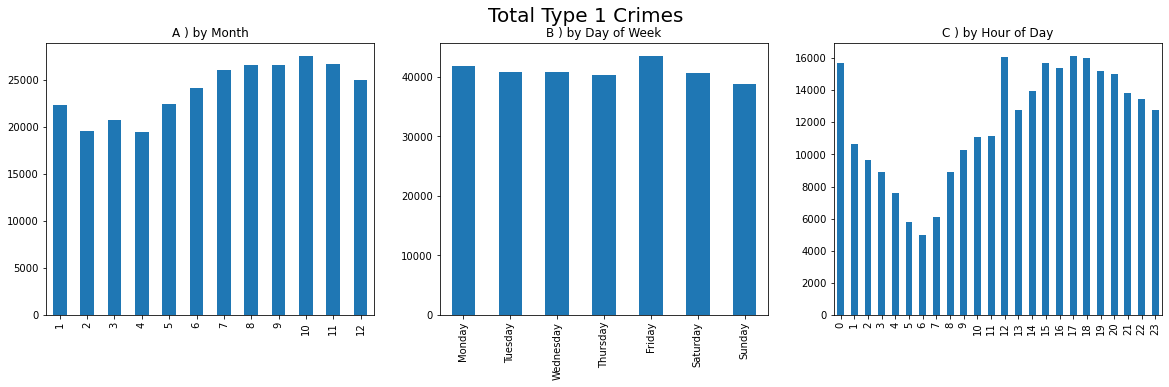

In [44]:
# code here
S2_gdf['Month'] = S2_gdf['Date-Time'].dt.month
S2_gdf['Day of Week'] = S2_gdf['Date-Time'].dt.day_name()
S2_gdf['Hour of Day'] = S2_gdf['Date-Time'].dt.hour
S2_gdf['DOW Order'] = S2_gdf['Date-Time'].dt.dayofweek

fig, axs = plt.subplots(1,3,figsize=(20,5),squeeze=False)

plots = ['Month','Day of Week','Hour of Day']

fig.suptitle('Total Type 1 Crimes',fontsize=20)
question = "A"
for n,i in enumerate(plots): 
    if i == 'Day of Week':
        temp = S2_gdf[[i,'CMPLNT_NUM','DOW Order']].groupby(i).agg({'CMPLNT_NUM':'count','DOW Order':'mean'})
        temp = temp.sort_values('DOW Order')
    else:
        temp = S2_gdf[[i,'CMPLNT_NUM']].groupby(i).count()
    temp = temp.rename({'CMPLNT_NUM':'CRIME COUNT'},axis='columns')
    temp['CRIME COUNT'].plot.bar(ax=axs[0,n],legend=False)
    axs[0,n].xaxis.set_label_text("")
    axs[0,n].set_title(question+" ) by "+ i)
    question = chr(ord(question)+1)

### 4. Bar plots: Felony assault vs grand larceny grouped by a) day of week and b) hour of day

In [45]:
# filter data for above crime types

S24_df = S2_gdf[S2_gdf['OFNS_DESC'].isin(['FELONY ASSAULT','GRAND LARCENY'])]
S24_df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Date-Time,geometry,index_right,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,Month,Day of Week,Hour of Day,DOW Order
0,123171799,12/31/2021,21:15:00,NaN,NaN,43.0,12/31/2021,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BRONX,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1021342.0,237277.0,UNKNOWN,WHITE HISPANIC,M,NaN,40.817877,-73.865994,"(40.81787660100008, -73.86599391299995)",PATROL BORO BRONX,NaN,65+,BLACK,M,2021-12-31 21:15:00,POINT (1021341.605 237280.017),40,10473,0,Bronx,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,12,Friday,21,4
1,586691204,11/12/2021,01:14:00,NaN,NaN,43.0,11/12/2021,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,FELONY,BRONX,OPPOSITE OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1027935.0,238389.0,UNKNOWN,UNKNOWN,U,NaN,40.820899,-73.842167,"(40.820898581000044, -73.84216725399993)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E,2021-11-12 01:14:00,POINT (1027934.606 238392.017),40,10473,0,Bronx,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,11,Friday,1,4
4,545417473,07/13/2019,17:40:00,NaN,NaN,43.0,07/13/2019,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BRONX,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1022372.0,237466.0,18-24,BLACK,M,NaN,40.818391,-73.862272,"(40.81839096800008, -73.86227161899996)",PATROL BORO BRONX,NaN,18-24,BLACK,M,2019-07-13 17:40:00,POINT (1022371.605 237469.017),40,10473,0,Bronx,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,7,Saturday,17,5
7,900583011,03/12/2019,16:30:00,NaN,NaN,43.0,03/12/2019,109,GRAND LARCENY,415.0,"LARCENY,GRAND FROM PERSON,PICK",COMPLETED,FELONY,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1022242.0,239684.0,18-24,WHITE HISPANIC,M,NaN,40.824479,-73.862729,"(40.82447930500007, -73.86272873299998)",PATROL BORO BRONX,NaN,18-24,WHITE HISPANIC,F,2019-03-12 16:30:00,POINT (1022241.605 239687.017),40,10473,0,Bronx,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,3,Tuesday,16,1
10,342739876,12/27/2021,20:40:00,NaN,NaN,43.0,12/27/2021,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BRONX,OPPOSITE OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1023225.0,237941.0,18-24,UNKNOWN,M,NaN,40.819691,-73.859187,"(40.81969098600007, -73.85918708599996)",PATROL BORO BRONX,NaN,18-24,BLACK,M,2021-12-27 20:40:00,POINT (1023224.606 237944.017),40,10473,0,Bronx,58284.0,5.952235e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,12,Monday,20,0


In [46]:
# group the numbers and normalize by total city population (per 100,000)

CityPop = zips['POPULATION'].sum()  

#DayofWeek
S24_df_DOW = S24_df[['CMPLNT_NUM','OFNS_DESC','Day of Week','DOW Order']]\
                            .groupby(['Day of Week','OFNS_DESC'])\
                            .agg({'CMPLNT_NUM':'count','DOW Order':'mean'})\
                            .reset_index(drop=False)
S24_df_DOW = S24_df_DOW.rename({'CMPLNT_NUM':'CRIME COUNT','OFNS_DESC':'Offense Description'},axis='columns')
S24_df_DOW['Normalized Crime Count'] = (S24_df_DOW['CRIME COUNT']/CityPop)*100000
S24_df_DOW = S24_df_DOW.sort_values('DOW Order')
S24_df_DOW = pd.pivot_table(S24_df_DOW, values=['Normalized Crime Count'], index=['Day of Week'],
                    columns=['Offense Description'], aggfunc=np.sum)
Ordering_df = S2_gdf[['Day of Week','DOW Order']].groupby('Day of Week').mean()
S24_df_DOW = pd.merge(S24_df_DOW,Ordering_df,left_index=True, right_index=True)\
                                                        .sort_values('DOW Order')\
                                                        .drop('DOW Order',axis=1)


#HourofDay
S24_df_HOD = S24_df[['CMPLNT_NUM','OFNS_DESC','Hour of Day']].groupby(['Hour of Day','OFNS_DESC']).count().reset_index(drop=False)
S24_df_HOD  = S24_df_HOD.rename({'CMPLNT_NUM':'CRIME COUNT','OFNS_DESC':'Offense Description'},axis='columns')
S24_df_HOD ['Normalized Crime Count'] = (S24_df_HOD['CRIME COUNT']/CityPop)*100000
S24_df_HOD
S24_df_HOD = pd.pivot_table(S24_df_HOD, values='Normalized Crime Count', index=['Hour of Day'],
                    columns=['Offense Description'], aggfunc=np.sum)

Text(0.5, 0.98, 'Grand Larceny and Felony Assault grouped by Day and Hour')

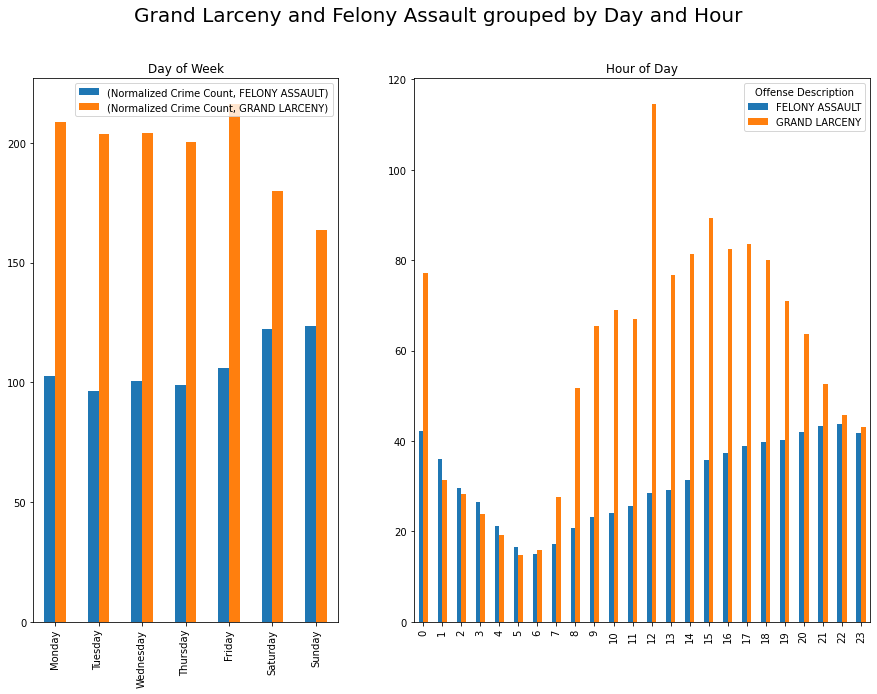

In [47]:
# plot two bar plots: one for day of week and other for hour of day
# each plot should have comparison of the two type of crime numbers (normalized) by weekday and hour respectively

f, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 3]}) 
S24_df_DOW.plot.bar(figsize=(10,10),ax=axs[0],title="Day of Week")
S24_df_HOD.plot.bar(figsize=(15,10),ax=axs[1],title="Hour of Day")
axs[0].xaxis.set_label_text("")
axs[1].xaxis.set_label_text("")
f.suptitle('Grand Larceny and Felony Assault grouped by Day and Hour',fontsize=20)


### 5. comparing the %% decomposition of type 1 crimes by category of crime

for matplotlib pie charts documentation: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

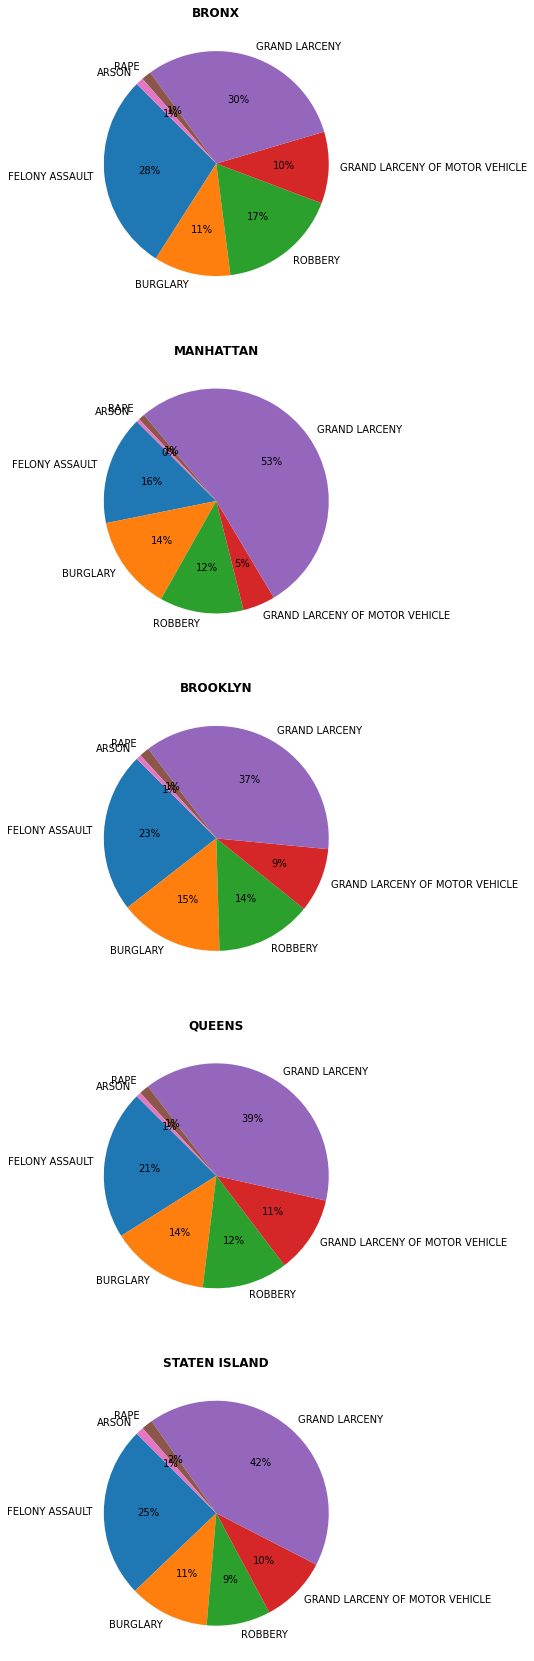

In [48]:
# plot 5 pie charts for each borough depicting % of each crime type within type 1 crimes

#for boro in data_type1.BORO_NM.unique():
    
    # complete this code here
fig1, axs = plt.subplots(5,1,figsize=(30,30))
labels = S2_gdf['OFNS_DESC'].unique()
for n,boro in enumerate(S2_gdf.BORO_NM.unique()):
    sizes = []
    temp = S2_gdf[S2_gdf['BORO_NM'] == boro]
    for i in labels:
        sizes.append((len(temp[temp['OFNS_DESC']==i])/len(temp)))
    axs[n].pie(sizes, labels=labels, autopct='%1.0f%%',shadow=False, startangle=135)
    axs[n].set_title(boro,fontweight ="bold")
    #axs[n].axis('equal')

## Section 3 - Hypothesis testing tasks

1. Plot the distribution (density plot) of daily number of total type 1 crimes for 2019.
Test the hypothesis if the distribution follows normal distribution.

2. Plot the distributions (density plots) of daily number of total type 1 crimes for weekdays and weekends (normalized by population) and perform a) the t-test for the hypothesis that the average daily crime over weekdays and weekends is the same, b) the KS-test for the hypothesis that the weekday and weekend daily crime numbers follow the same distribution. Can you reject either hypothesis at the 10% significance level? 

In [49]:
S3_gdf = S2_gdf.copy()

### 1. plotting distributions and normality test

In [50]:
#introduce the function performing distribution analysis

def distribution_analysis(x1,bins = 50, vis_means = True, vis_curve = True, print_outputs = True):

    xlabel = 'values'
    mu = x1.mean() #compute the mean
    print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x1,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
                                bins=bins,color = 'darkblue', 
                                hist_kws={'edgecolor':'black'},
                                kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)      
    ylim = plt.gca().get_ylim()
    
    #(to make sure the fitted distribution would not affect it)
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100)
    pars = None
    
    
    #fit and visualize the theoretic distribution
    pars = norm.fit(x1)
    plt.plot(h,norm.pdf(h,*pars),'r')
    plt.xlabel(xlabel)
    plt.ylim(ylim)
    plt.show()
    
    
    return pars

In [51]:
# group type 1 crime numbers per day for 2019
S3_gdf['Date'] = S3_gdf['Date-Time'].dt.date
S3_gdf['Year'] = S3_gdf['Date-Time'].dt.year
S31_df = S3_gdf[S3_gdf['Year'] == 2019][['Date','CMPLNT_NUM']].groupby('Date').count()

Mean = 256.46
Standard deviation = 33.06
1 percentile = 181.76
5 percentile = 201.20
25 percentile = 234.00
50 percentile = 260.00
75 percentile = 280.00
95 percentile = 306.00
99 percentile = 326.72


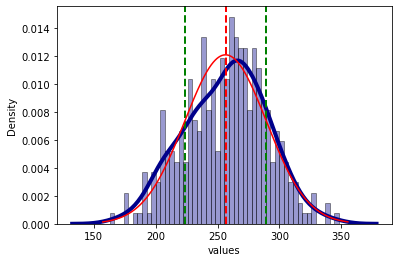

(256.46027397260275, 33.01260340364847)

In [52]:
# plot the distribution (density plot)

distribution_analysis(S31_df['CMPLNT_NUM'])

In [53]:
# normality test

stats.kstest(S31_df['CMPLNT_NUM'],'norm',args=(S31_df['CMPLNT_NUM'].mean(),S31_df['CMPLNT_NUM'].std()))

KstestResult(statistic=0.04948516674174297, pvalue=0.32252824788222456)

We <b>cannot Reject</b> the Null Hypothesis that the distribution is normal at 95% confidnece

### 2. weekdays vs weekend distribution

In [54]:
# create dataframes for weekdays and weekends

S32_df_Weekday = S3_gdf[S3_gdf['DOW Order'] <= 4]
S32_df_Weekend = S3_gdf[S3_gdf['DOW Order'] > 4]

In [55]:
# group daily numbers for weekdays and weekends

#Created a new column and normalized the values

S32_df_Weekday = S32_df_Weekday[['Date','CMPLNT_NUM']].groupby('Date').count()
S32_df_Weekday['CMPLNT_NUM'] = S32_df_Weekday['CMPLNT_NUM']/CityPop
S32_df_Weekend = S32_df_Weekend[['Date','CMPLNT_NUM']].groupby('Date').count()
S32_df_Weekend['CMPLNT_NUM'] = S32_df_Weekend['CMPLNT_NUM']/CityPop

Mean = 0.00
Standard deviation = 0.00
1 percentile = 0.00
5 percentile = 0.00
25 percentile = 0.00
50 percentile = 0.00
75 percentile = 0.00
95 percentile = 0.00
99 percentile = 0.00


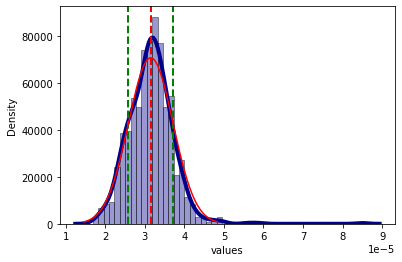

(3.149909275274434e-05, 5.644422211082335e-06)

In [56]:
# plot distribution (density plot)

distribution_analysis(S32_df_Weekday['CMPLNT_NUM'])

Mean = 0.00
Standard deviation = 0.00
1 percentile = 0.00
5 percentile = 0.00
25 percentile = 0.00
50 percentile = 0.00
75 percentile = 0.00
95 percentile = 0.00
99 percentile = 0.00


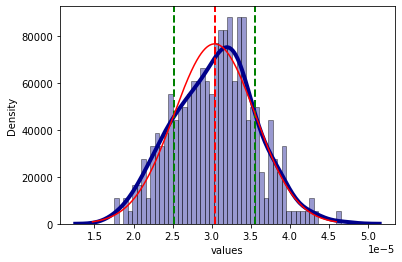

(3.0379736339272957e-05, 5.20272890765036e-06)

In [57]:
distribution_analysis(S32_df_Weekend['CMPLNT_NUM'])

In [58]:
# t-test

stats.ttest_ind(S32_df_Weekday['CMPLNT_NUM'],S32_df_Weekend['CMPLNT_NUM'])

Ttest_indResult(statistic=3.0254026055921392, pvalue=0.002541017839469343)

The hypothesis that the average daily crime over weekdays and weekends is the same <b> can be rejected</b> at the 10% significance or the 90% confidence level according to the T-test

In [59]:
# k-s test

stats.ks_2samp(S32_df_Weekday['CMPLNT_NUM'],S32_df_Weekend['CMPLNT_NUM'])

KstestResult(statistic=0.08634222919937205, pvalue=0.0668433305392736)

The hypothesis that the weekday and weekend daily crime numbers follow the same distribution <b> can be rejected </b> at the 10% significance or the 90% confidence level accoriding to the KS-Test